<body style="font-family: verdana">
<div style="background-color:#008798;padding: 20px;">  
<h1 style="font-size:40px;font-family:verdana;">
    <p style="color:white;text-align: center;"> Hotel Booking Demand Analysis (Europe) </p>
</h1>
</div>

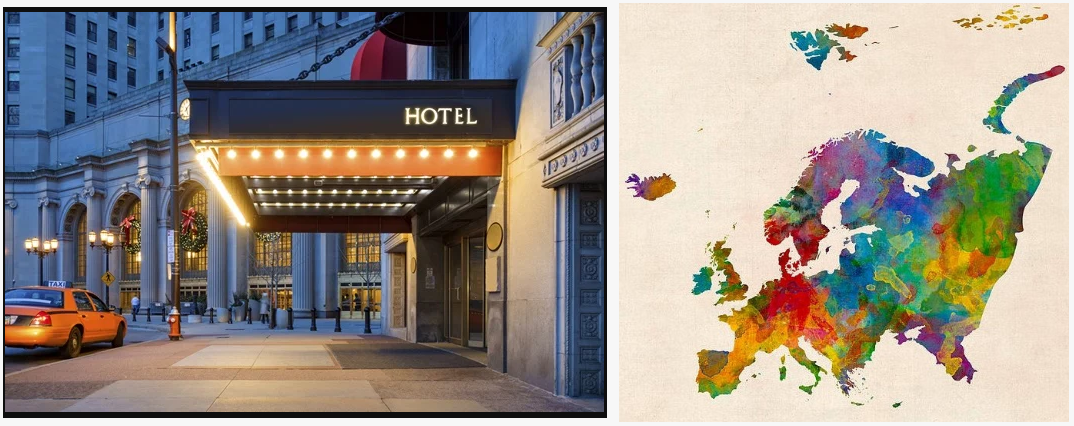


<div style="background-color:#fececc;padding: 20px;">   
<font color=orange>
    <h1> Content </h1>
</font>
    <br/>
        <p>
            <ol style="background-color:#fff6eb;padding: 30px;">
              <li>Business Understanding</li>
              <li>Data Understanding</li>
              <li>Data Preparation/Data cleaning</li>
              <li>Data Visualization</li>
              <li>Business Insights</li>
            </ol>
        </p>
</div>


<div style="background-color:#cbeabe;padding: 20px;">   

<h1> 1. Business Understanding </h1>

<br/><br/>
The hotel industries face challenges like cancellations or no-showups by the customers and thereby they lose out on a lot of revenue. The other challenge is to plan out personnel and food requirements by knowing the busy months and duration of stay. We have to understand the affect of tourism (international vs domestic), cancellations based on hotel type, market segment, type of customer, lead time, month, etc. To invest in the hotel, we need to understand the revenue affecting predictors.
<br/>
    The questions that are answered through the analysis are :
    <br/>
    <p>
        <ol style="background-color:#f4fbf4;padding: 30px;">
              <li>Tourism : Do we have more international or Domestic tourists?</li>
              <li>Cancellations : Where do we have the most cancellations?</li>
                <ul>
                    <li>Hotel type?</li>
                    <li>Market segment?</li>
                    <li>Type of customer?</li>
                    <li>Lead time?</li>
                    <li>Month?</li>
                </ul>
              <li>Revenue : Where are we getting more Revenue from?</li>
                <ul>
                    <li>Average Daily Rate</li>
                    <li>Room type?</li>
                    <li>Monthly Price variation?</li>
                </ul>
            </ol>
        </p>
</div>

<br/><br/>

# 2. Data Understanding

    1. The dataset contains data of two hotels, i.e. City hotel and a Resort hotel. 
        Both the hotels are located in Portugal. The distance between the hotels is approx. 280km.
        Time-period : 1st of July of 2015 to the 31st of August 2017

    2. Reference 
        https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub
        
    3. Dataset
        https://www.kaggle.com/jessemostipak/hotel-booking-demand
        

In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt
import warnings
plt.rcParams['font.family'] = "serif"
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

### Importing data

In [2]:
data = pd.read_csv("hotel_bookings.csv")
print('Total rows and columns in data ',data.shape)
data.head()

Total rows and columns in data  (119390, 32)


hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  deposit_type  \
0                        0                     0       2  ...    No Deposit   
1                        0                     0       2  ...    No Deposit   
2                        0                     1       1  ...    No Deposit   
3                        0                     1       1  ...    No Deposit   
4                        0                     2       2  ...    No Deposit   

   agent company days_in_waiting_list customer_type   adr  \
0    NaN     NaN                    0     Transient   0.0   
1    NaN     NaN                    0     Transient   0.0   
2    NaN     NaN                    0     Transient  75.0   
3  304.0     NaN                    0     Transient  75.0   
4  240.0     NaN                    0     Transient  98.0   

   required_car_parking_spaces  total_of_special_requests  reservation_status  \
0                            0                          0           Check-Out   
1                            0                          0           Check-Out   
2                            0                          0           Check-Out   
3                            0                          0           Check-Out   
4                            0                          1           Check-Out   

  reservation_status_date  
0              2015-07-01  
1              2015-07-01  
2              2015-07-02  
3              2015-07-02  
4              2015-07-03  

[5 rows x 32 columns]

# 3.Data Preparation/Data Cleaning

### Dropping irrelevant columns

In [3]:
data = data.drop(['agent','company','reservation_status_date', 'arrival_date_week_number'], axis=1)
print("New Rows X Cols : ", data.shape)

New Rows X Cols :  (119390, 28)


### Checking Null Values

In [4]:
data.isnull().sum() 

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_spe

### Dealing with Null values

In [5]:
# 1. children                               4
# 2. country                              488
# 3. agent                              16340      # could be done without agent
# 4. company                           112593      # could be Private

replace_NAs = {'children' : 0, 'country' : 'Unknown', 'agent': 0, 'company' : 0}

cleaned_data = data.fillna(replace_NAs)
cleaned_data.isnull().sum() 

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

### Checking and dealing with unusual values

In [6]:
# 1. Meal has 'undefined' values- (can be converted to SC-No Meal Package selected)
print("Before\n\n", cleaned_data['meal'].value_counts())

cleaned_data['meal']=cleaned_data['meal'].replace({'Undefined': 'SC'})
print("\nAfter\n\n", cleaned_data['meal'].value_counts())

Before

 BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

After

 BB    92310
HB    14463
SC    11819
FB      798
Name: meal, dtype: int64


In [7]:
# 2. Rows with 0 adults, i.e. 0 guest rows should be dropped

print("Before \n\n", cleaned_data['adults'].value_counts())

no_guests = list(cleaned_data.loc[cleaned_data['adults']==0].index)
cleaned_data.drop(cleaned_data.index[no_guests], inplace=True)

print("\n\n After \n\n", cleaned_data['adults'].value_counts())

Before 

 2     89680
1     23027
3      6202
0       403
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64


 After 

 2     89680
1     23027
3      6202
4        62
26        5
27        2
20        2
5         2
55        1
50        1
40        1
10        1
6         1
Name: adults, dtype: int64


### Descriptive Statistical Analysis

In [8]:
cleaned_data.describe().T

count         mean         std      min  \
is_canceled                     118987.0     0.370755    0.483009     0.00   
lead_time                       118987.0   104.070537  106.890775     0.00   
arrival_date_year               118987.0  2016.156362    0.707742  2015.00   
arrival_date_day_of_month       118987.0    15.796768    8.781186     1.00   
stays_in_weekend_nights         118987.0     0.926950    0.995270     0.00   
stays_in_week_nights            118987.0     2.499046    1.897763     0.00   
adults                          118987.0     1.862691    0.570060     1.00   
children                        118987.0     0.100431    0.390216     0.00   
babies                          118987.0     0.007950    0.097473     0.00   
is_repeated_guest               118987.0     0.031550    0.174799     0.00   
previous_cancellations          118987.0     0.087337    0.845693     0.00   
previous_bookings_not_canceled  118987.0     0.137343    1.499527     0.00   
booking_changes                 118987.0     0.218528    0.638088     0.00   
days_in_waiting_list            118987.0     2.325565   17.614198     0.00   
adr                             118987.0   102.008076   50.448822    -6.38   
required_car_parking_spaces     118987.0     0.062654    0.245544     0.00   
total_of_special_requests       118987.0     0.570642    0.792400     0.00   

                                   25%     50%     75%     max  
is_canceled                        0.0     0.0     1.0     1.0  
lead_time                         18.0    69.0   160.0   737.0  
arrival_date_year               2016.0  2016.0  2017.0  2017.0  
arrival_date_day_of_month          8.0    16.0    23.0    31.0  
stays_in_weekend_nights            0.0     1.0     2.0    19.0  
stays_in_week_nights               1.0     2.0     3.0    50.0  
adults                             2.0     2.0     2.0    55.0  
children                           0.0     0.0     0.0    10.0  
babies                             0.0     0.0     0.0    10.0  
is_repeated_guest                  0.0     0.0     0.0     1.0  
previous_cancellations             0.0     0.0     0.0    26.0  
previous_bookings_not_canceled     0.0     0.0     0.0    72.0  
booking_changes                    0.0     0.0     0.0    18.0  
days_in_waiting_list               0.0     0.0     0.0   391.0  
adr                               69.5    95.0   126.0  5400.0  
required_car_parking_spaces        0.0     0.0     0.0     8.0  
total_of_special_requests          0.0     0.0     1.0     5.0

In [9]:
cleaned_data.describe(include='object').T

count unique         top    freq
hotel                 118987      2  City Hotel   78940
arrival_date_month    118987     12      August   13829
meal                  118987      4          BB   92020
country               118987    178         PRT   48440
market_segment        118987      8   Online TA   56221
distribution_channel  118987      5       TA/TO   97560
reserved_room_type    118987      9           A   85863
assigned_room_type    118987     11           A   73983
deposit_type          118987      3  No Deposit  104238
customer_type         118987      4   Transient   89337
reservation_status    118987      3   Check-Out   74872

### Correlation plot

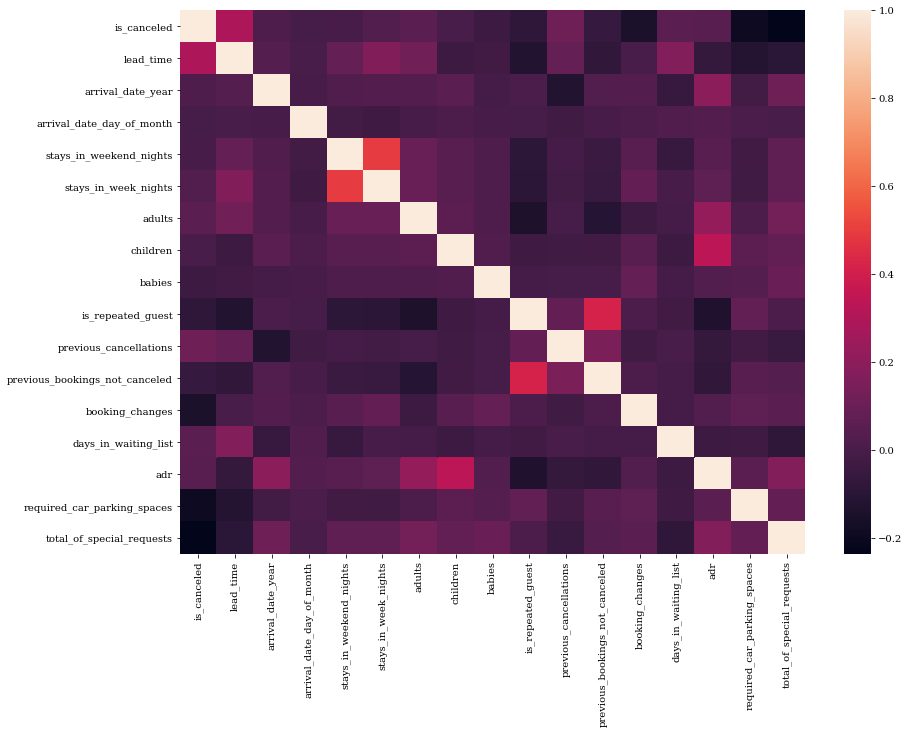

In [10]:
fig,axes = plt.subplots(1,1,figsize=(14,10))
sns.heatmap(cleaned_data.corr())
plt.show()

# 4. EDA

### Content of Exploratory Data Analysis
    
    1. Tourism : Do we have more international or Domestic tourists?
    2. Cancellations : Where do we have the most cancellations?
        Hotel type?
        Market segment?
        Type of customer?
        Lead time?
        Month?
    3. Revenue : Where are we getting more Revenue from?
        ADR
        Room type
        Monthly Price variation

<br/><br/>
### Number of guests arrived at the hotels

In [11]:
# Taking non-cancelled bookings only as the number of guests

resort_nc = cleaned_data.loc[(cleaned_data['hotel'] == 'Resort Hotel') & (cleaned_data['is_canceled'] == 0)]
city_nc = cleaned_data.loc[(cleaned_data['hotel'] == 'City Hotel') & (cleaned_data['is_canceled'] == 0)]

print("Resort Hotel : There are ", resort_nc.shape[0], " non-cancelled bookings.")
print("City Hotel : There are ", city_nc.shape[0], " non-cancelled bookings.")

Resort Hotel : There are  28927  non-cancelled bookings.
City Hotel : There are  45945  non-cancelled bookings.


<br/><br/>

### a) Tourism Effect : International and Domestic guests    


<br/><br/>
### Home country of guests

In [12]:
country_data = pd.DataFrame(cleaned_data.loc[cleaned_data["is_canceled"] == 0]["country"].value_counts())
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index

guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.index, 
                    range_color=(0, 12),
                    color_continuous_scale="Viridis",
                    title="Country of guests")
guest_map.show()


### Insights
<div class="alert alert-block alert-info">
Most of the guests are coming from the European countries. Especially from Portugal itself.
They have guests from other continents and countries as well but the percentage is less compared to European countries. 
</div>

<br/><br/>
### Domestic tourism


In [13]:
fig = px.choropleth(country_data, 
                    locations=country_data.index, 
                    color=country_data["Guests in %"],
                    color_continuous_scale="Viridis",
                    range_color=(0, 12),
                    scope="europe"
                    )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Insights
<div class="alert alert-block alert-info">
27.98% of the customers are coming from Portugal. 12.90% from Great Britain, 11.28% from France, 8.5% from Spain, 8.09% from Germany are coming to the hotels.
</div>

<br/><br/>

### b) Cancellations : Where are we getting the most cancellations from?
<br/><br/>


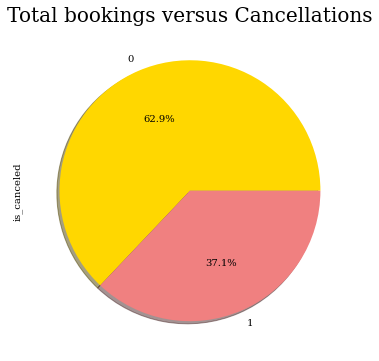

In [14]:
plt.figure(figsize = (12,6))
plt.title("Total bookings versus Cancellations", fontdict = {'fontsize':20})
cols = ['gold', 'lightcoral']
cleaned_data['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, colors=cols);

### Insights
<div class="alert alert-block alert-info">
More than 37% of the bookings tend to get cancelled by the customers. We need to find the predictors which are the most responsible ones for the cancellations of bookings. 

The hotel will be able to take up proper and necessary measures to cope up with cancellations.
</div>


<br/><br/>
### b1) Cancellations by hotel type


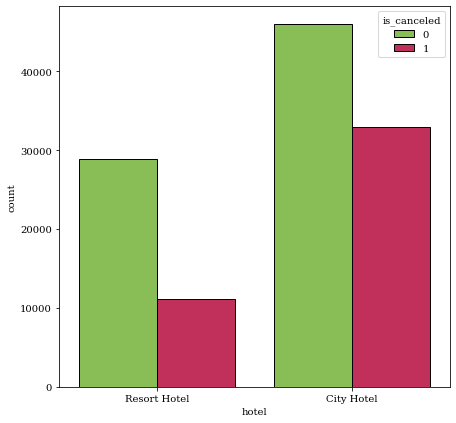

In [15]:
plt.figure(figsize = (7,7))
sns.countplot(x='hotel',
              hue='is_canceled',
              palette=['#88cf45',"#d81850"],
              linewidth=1,
              edgecolor=(0,0,0),
              data=cleaned_data);

### Insights
<div class="alert alert-block alert-info">
For resort hotels, cancellations are more than the bookings but for city hotels, cancellations are comparitively lower.
</div>

<br/><br/>
### b2) Cancellations by Market Segments

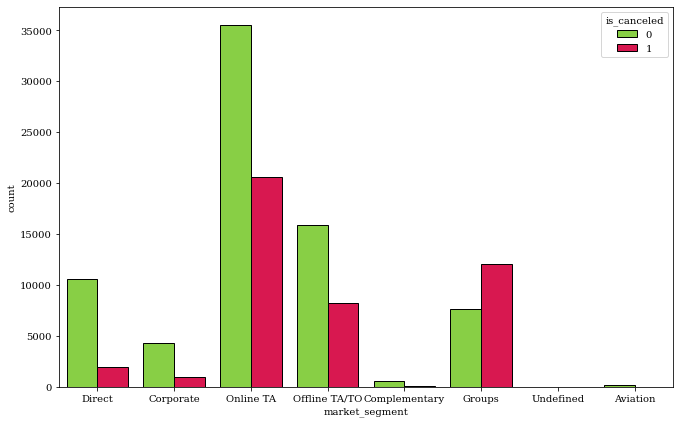

In [16]:
plt.figure(figsize = (11,7))
ax = sns.countplot(x = "market_segment", 
                   hue = 'is_canceled', 
                   edgecolor=(0,0,0),
                   saturation=1,
                   linewidth=1,
                   palette=['#88cf45',"#d81850"],
                   data= cleaned_data);

### Insights
<div class="alert alert-block alert-info">

Cancellations by Market Segments : Offline TA/TO (Travel Agents/Tour Operators) and Online TA has cancellation rate more than 33%. Groups segment has cancellation rate more than 50%. Direct segment has very less cancellations.
</div>

<br/><br/>
### b3) Type of customer and cancellations

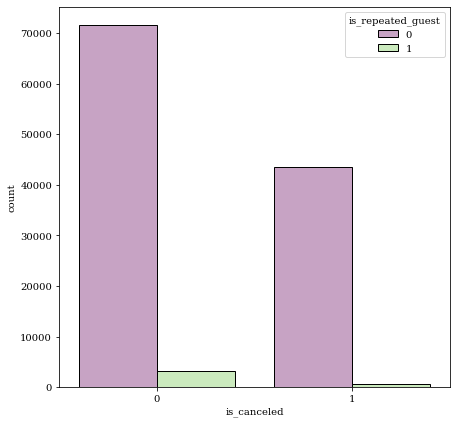

In [17]:
plt.figure(figsize = (7,7))
ax = sns.countplot(x = "is_canceled", 
                   hue = 'is_repeated_guest', 
                   edgecolor=(0,0,0),
                   saturation=1,
                   linewidth=1,
                   palette=['#c7a3c4',"#cbeabe"],
                   data = cleaned_data);

### Insights
<div class="alert alert-block alert-info">
Cancellations by repeated guests : Repeated guests hardly cancel their bookings, hence it's always better to target a cutomer to come back rather than trying to generate a new customer.
</div>

<br/><br/>
### b4) Lead time and cancellations

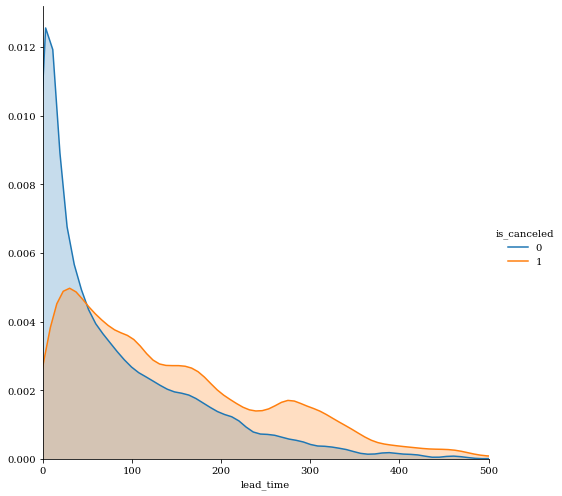

In [18]:
(sns.FacetGrid(cleaned_data, hue = 'is_canceled',
             height = 7,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

### Insights
<div class="alert alert-block alert-info">

People tend to cancel their bookings when lead time is more than approximately 60 days. Also, cancellation rate is higher after this point. 
</div>

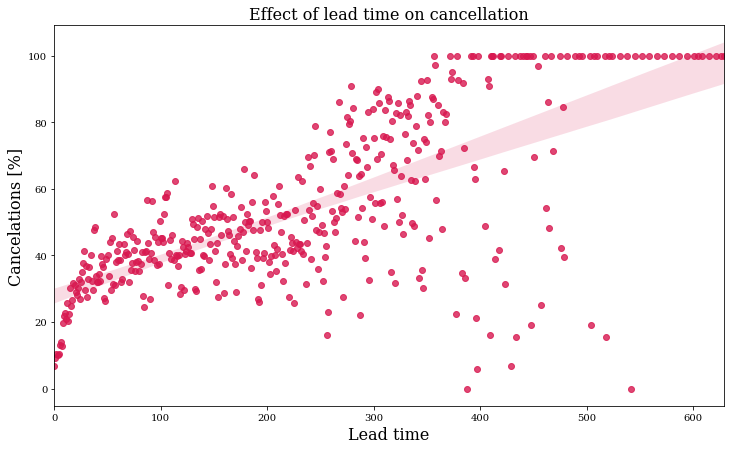

In [19]:
lead_cancel_data = cleaned_data.groupby("lead_time")["is_canceled"].describe()
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

plt.figure(figsize=(12, 7))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100, color="#d81850");
plt.title("Effect of lead time on cancellation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.show()


<br/><br/>
### b5) Month and cancellations

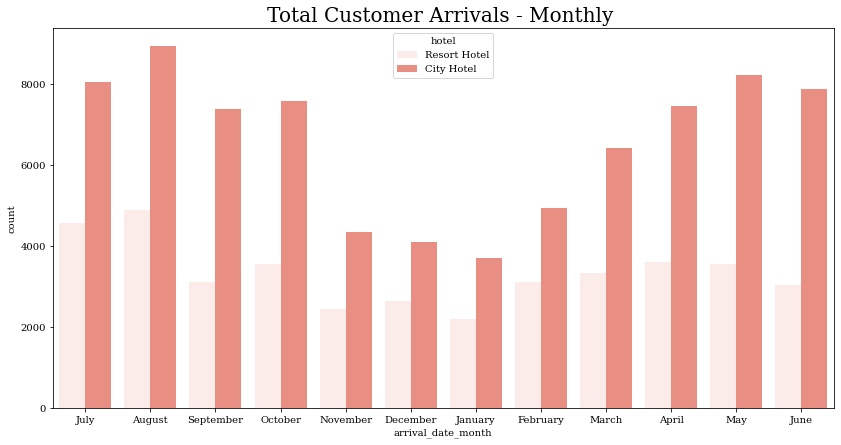

In [20]:
plt.figure(figsize =(14,7))
plt.title("Total Customer Arrivals - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", 
                   hue = 'hotel', 
                   color="salmon",
                   data = cleaned_data);

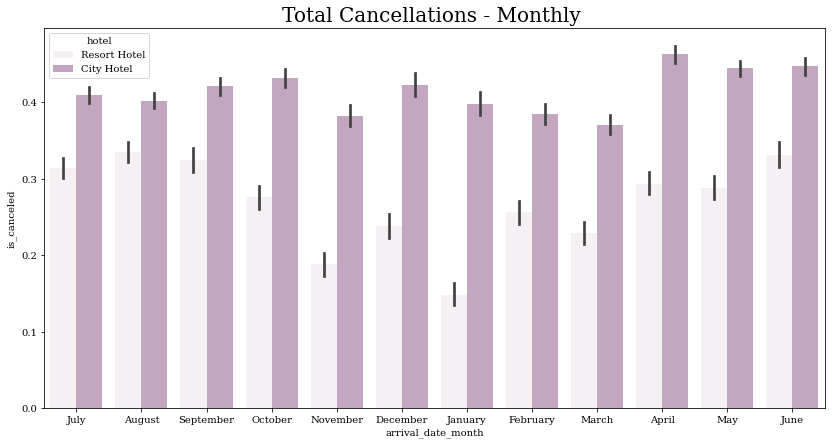

In [21]:
plt.figure(figsize =(14,7))
plt.title("Total Cancellations - Monthly ", fontdict={'fontsize': 20})
sns.barplot(x = 'arrival_date_month', 
            y = 'is_canceled', 
            hue = 'hotel',
            color="#c7a3c4", 
            data = cleaned_data);

### Insights
<div class="alert alert-block alert-info">

City hotels : 
    Winter months - Nov, Feb and Mar months have less customers who book and cancel.
        
Resort hotels:
    Winter months - Nov, Dec, Jan, Feb, Mar months have very less cancellations.
</div>

<br/><br/>
## c) Revenue - Where are we getting more Revenue from?

### c1) ADR - Average Daily Rate w.r.t. Room Types

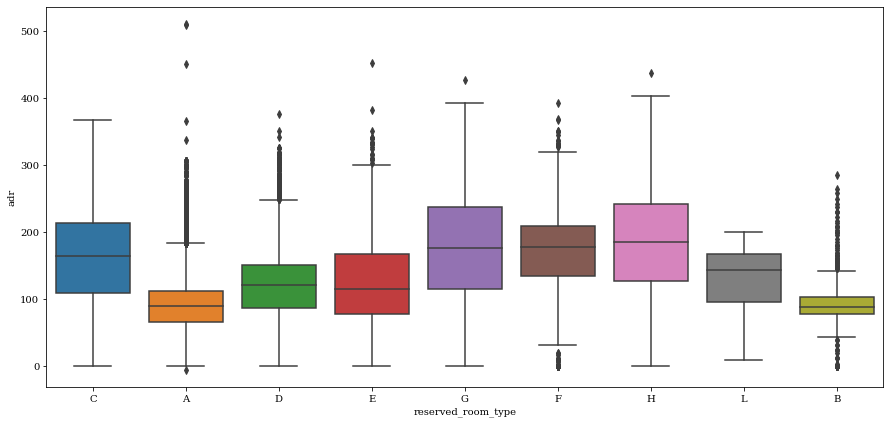

In [22]:
plt.figure(figsize =(15,7))
sns.boxplot(x = 'reserved_room_type', y = 'adr',  data = cleaned_data[cleaned_data['adr'] < 4000]);

### Insights
<div class="alert alert-block alert-info">
Room type G, F, H and C are the most expensive room types.<br/>
Rooms B and A generate the least ADR.
</div>

<br/><br/>
### c2) Room Type and Revenue

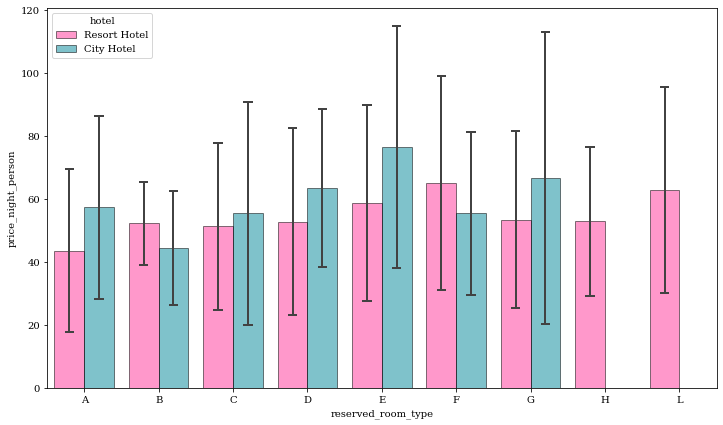

In [23]:
cleaned_data['total_legit_guests'] = cleaned_data.adults + cleaned_data.children
confirmed_bookings_copy = cleaned_data.drop(index=cleaned_data.loc[cleaned_data.total_legit_guests==0].index, axis=0)
confirmed_bookings_copy['price_night_person'] = confirmed_bookings_copy.adr / confirmed_bookings_copy.total_legit_guests
prices = confirmed_bookings_copy[['hotel', 'reserved_room_type', 'price_night_person']].sort_values('reserved_room_type')

plt.figure(figsize=(12,7))
sns.barplot(x=confirmed_bookings_copy.reserved_room_type.sort_values(), 
            y='price_night_person', 
            hue='hotel', 
            data=confirmed_bookings_copy, 
            alpha=0.5, ci='sd', 
            errwidth=2, 
            edgecolor=(0,0,0),
            saturation=1,
            linewidth=1,
            palette=['#ff3399',"#008798"],
            capsize=0.1);
plt.show()

### Insights
<div class="alert alert-block alert-info">
The most revenue generating room type is E followed by G.
</div>

<br/><br/>
### c3) Monthly Price Variation

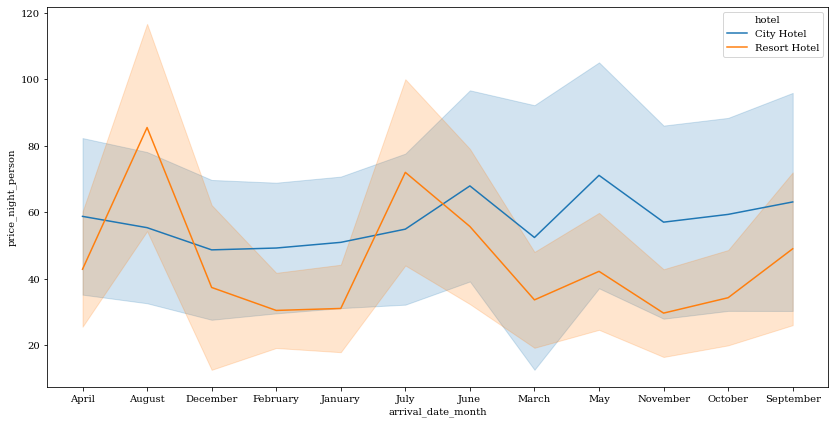

In [24]:
price_variation = confirmed_bookings_copy[['hotel','arrival_date_month', 'price_night_person']].sort_values('arrival_date_month')
position = price_variation.arrival_date_month.value_counts().sort_index().index
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.lineplot(x='arrival_date_month', y='price_night_person', hue='hotel', data=price_variation, ci='sd');
ax.set_xticks([p for p in position])
ax.set_xticklabels(position)
plt.show()

### Insights
<div class="alert alert-block alert-info">
Summer season is the holiday season but people choose city hotel instead of resort hotel.
</div>
<br/><br/>

<div style="background-color:#b8f5de;padding: 20px;">   
    
<h1> 5. Business Insights </h1>
<br/><br/>

<h3> Findings </h3><br/>
    <ol style="background-color:#f4fbf4;padding: 30px;padding: 20px;">
    1. Portugal, Great Britain, France, Spain, Germany and Ireland are some of the countries from which most of the people visit to the hotel in the Europe.<br/>
    2. Online Market segments gets a lot of customers in comparison to other modes.<br/>
    3. During Summer and fall season most of the customers visit the hotels.<br/>
    4. Online cancellations are comparatively more than when the tickets are booked from other mediums.<br/>
    </ol>
<br/>

<h3> Suggestion </h3> <br/>
    <ol style="background-color:#f4fbf4;padding: 30px;padding: 20px;">
    1. The hotel industry can take the advantage of seasons and months specifically.<br/>
    2. They can target customers online as most of the customers book tickets online so they can be targeted with vacation trip ads.<br/>
    3. The hotels can come up with certain off-seasonal discounts to attract more customers during non-holiday seasons.<br/>
    4. They can reduce the number of cancellations by adding non-refund option in festive and Holiday seasons when there’s a chance of more occupancy.<br/>
    5. They should encourage direct bookings by offering some special discounts.<br/>
    </ol>
<br/>

<h3> Conclusion </h3><br/>
    <ol style="background-color:#f4fbf4;padding: 30px;padding: 20px;">
    From the dataset analyzed in the project we can conclude that the hotel industry can benefit a lot by studying the type of customers, their booking mode, the month of the year and the seasons in the country. Cancellation analysis can make the hotel industry prepare for the vulnerable customers and months. The hotels can market based on the type of customers and the month they’re coming in.
    </ol>
</div>
